In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dark_horse = cv2.imread('../DATA/horse.jpg')
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('../DATA/rainbow.jpg')
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('../DATA/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

In [2]:
img = rainbow
img.shape

(550, 413, 3)

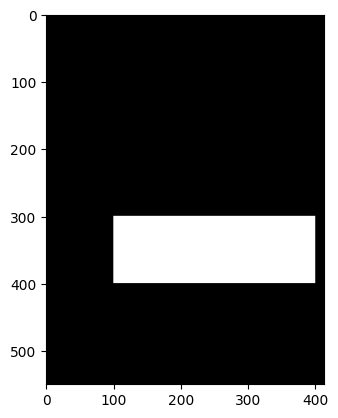

In [4]:
mask = np.zeros(img.shape[:2], np.uint8) # all zeros, so it is pure black
mask[300:400, 100:400] = 255 # define a white region
plt.imshow(mask, cmap='gray')

In [5]:
masked_img = cv2.bitwise_and(img, img, mask=mask)
show_masked_img = cv2.bitwise_and(show_rainbow, show_rainbow, mask=mask)

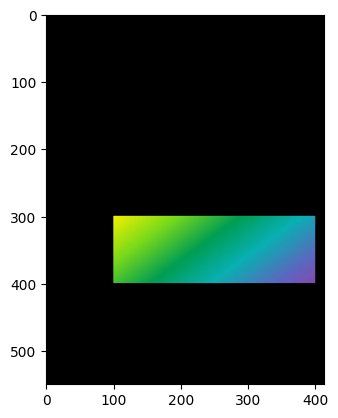

In [8]:
plt.imshow(show_masked_img)

In [12]:
hist_mask_values_red = cv2.calcHist([masked_img], channels=[0], mask=mask, histSize=[256], ranges=[0, 256])
hist_values_red = cv2.calcHist([img], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

Text(0.5, 1.0, 'RED HISTOGRAM FOR MASKED RAINBOW')

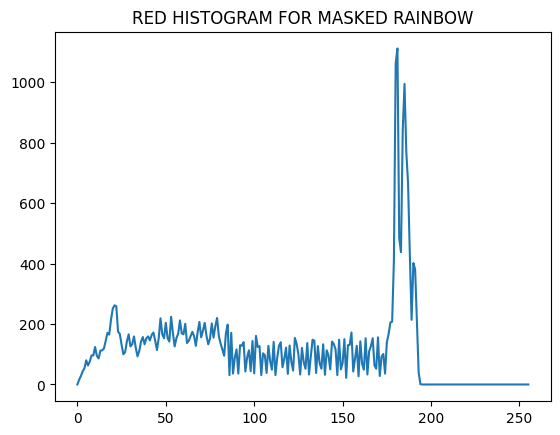

In [13]:
plt.plot(hist_mask_values_red)
plt.title('RED HISTOGRAM FOR MASKED RAINBOW')

Text(0.5, 1.0, 'RED HISTOGRAM FOR NORMAL RAINBOW')

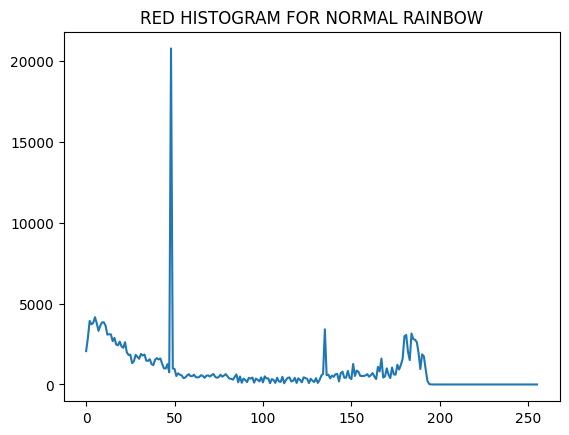

In [14]:
plt.plot(hist_values_red)
plt.title('RED HISTOGRAM FOR NORMAL RAINBOW')

In [17]:
gorilla = cv2.imread('../DATA/gorilla.jpg', 0)
def display(img, cmap = None):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)


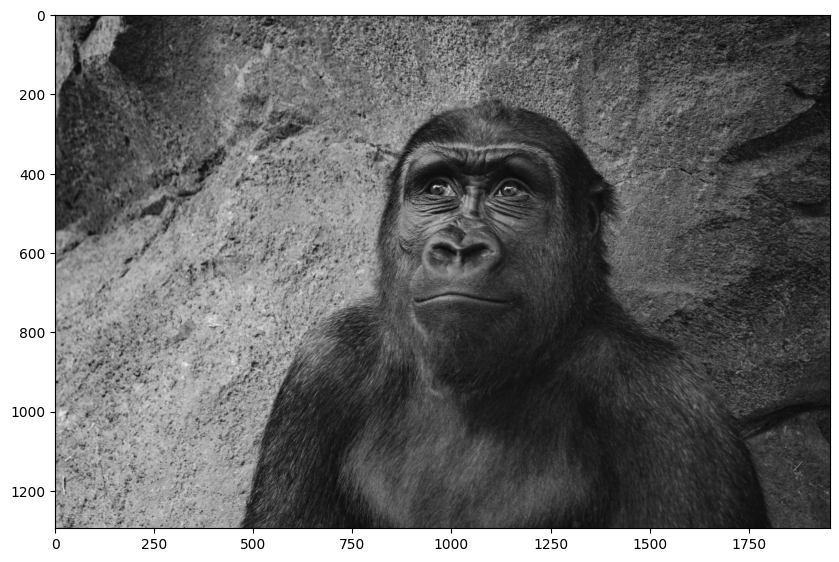

In [18]:
display(gorilla, 'gray')

In [19]:
hist_values = cv2.calcHist([gorilla], [0], None, [256], [0, 256])

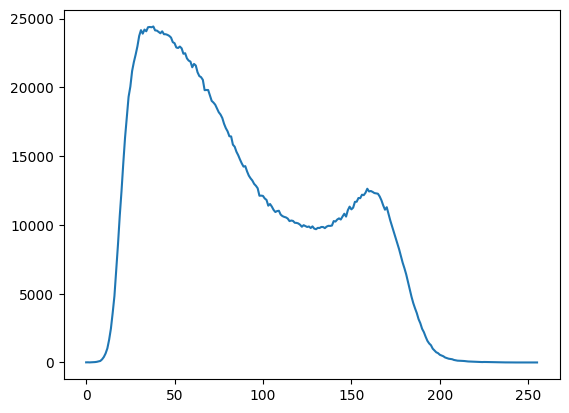

In [20]:
plt.plot(hist_values)

In [21]:
eq_gorilla = cv2.equalizeHist(gorilla)

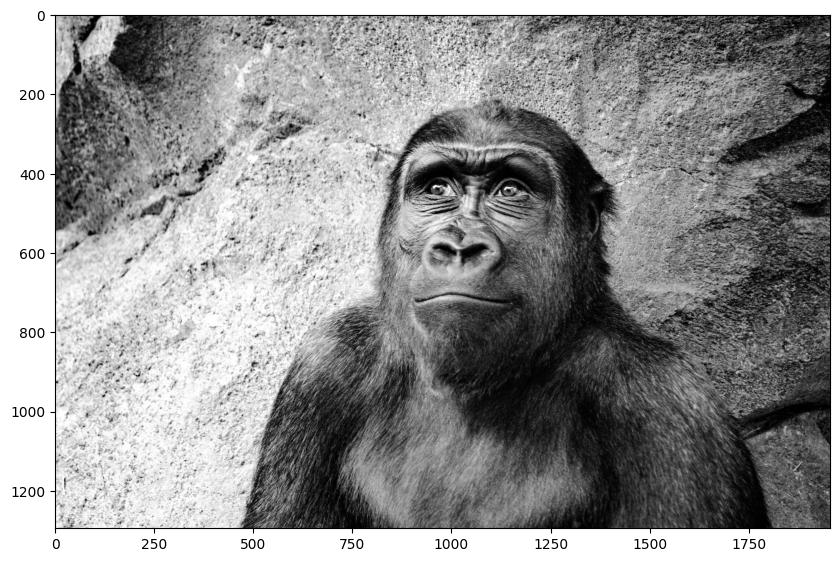

In [22]:
display(eq_gorilla, 'gray')

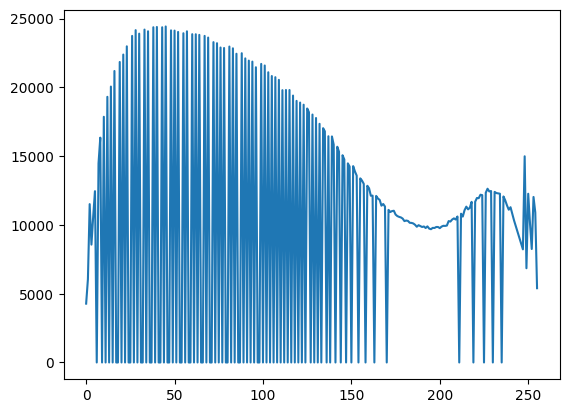

In [23]:
hist_values = cv2.calcHist([eq_gorilla], [0], None, [256], [0, 256])
plt.plot(hist_values)

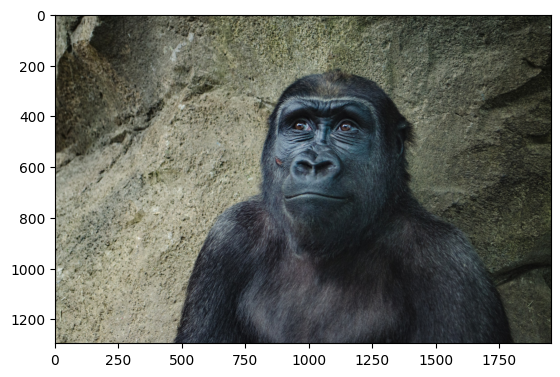

In [24]:
color_gorilla = cv2.imread('../DATA/gorilla.jpg')
show_gorilla = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2RGB)
plt.imshow(show_gorilla)

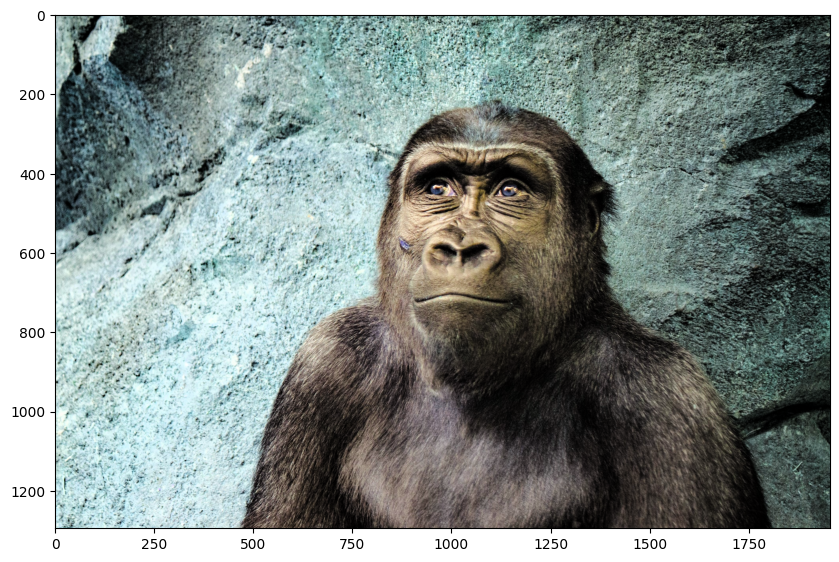

In [25]:
hsv = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV) # move to hsv
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])
eq_color_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
display(eq_color_gorilla)